# PySpark

**PySpark** is an interface for Apache Spark in Python. It is not only allows you to write Spark applications using Python APIs, but also provides the PySpar shell for interactively analyzing your data in a distributed environment. PySpark supports most of Spark's features such as Spark SQL, DataFrame, Streaming, MLib (Machine Leaning) and Spark Core.

[**YouTube Playlist Link**](https://www.youtube.com/playlist?list=PLMWaZteqtEaJFiJ2FyIKK0YEuXwQ9YIS_)

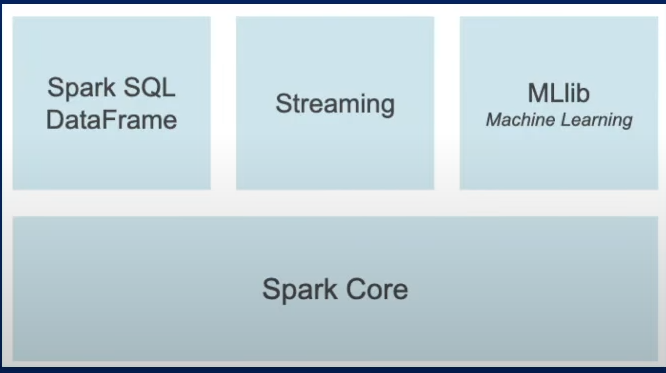


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=d85eb2d1e8b07ddf3d587a5fcd751d8ce75da5776bd0ab5b687462b043d8d24d
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


# **1. `createDataFrame()`**

DataFrame is a distributed collection of data organized into named columns. It is conceptually equivalent to a table in a relational database.

In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Colab PySpark").getOrCreate()


In [ ]:
data= [(1, "Maheer"), (2, "Wafa")]

df= spark.createDataFrame(data= data, schema= ['id', 'name'])
df.show()


+---+------+
| id|  name|
+---+------+
|  1|Maheer|
|  2|  Wafa|
+---+------+



In [ ]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)



In [ ]:
from pyspark.sql.types import *

In [ ]:
help(StructType)

Help on class StructType in module pyspark.sql.types:

class StructType(DataType)
 |  StructType(fields: Optional[List[pyspark.sql.types.StructField]] = None)
 |  
 |  Struct type, consisting of a list of :class:`StructField`.
 |  
 |  This is the data type representing a :class:`Row`.
 |  
 |  Iterating a :class:`StructType` will iterate over its :class:`StructField`\s.
 |  A contained :class:`StructField` can be accessed by its name or position.
 |  
 |  Examples
 |  --------
 |  >>> from pyspark.sql.types import *
 |  >>> struct1 = StructType([StructField("f1", StringType(), True)])
 |  >>> struct1["f1"]
 |  StructField('f1', StringType(), True)
 |  >>> struct1[0]
 |  StructField('f1', StringType(), True)
 |  
 |  >>> struct1 = StructType([StructField("f1", StringType(), True)])
 |  >>> struct2 = StructType([StructField("f1", StringType(), True)])
 |  >>> struct1 == struct2
 |  True
 |  >>> struct1 = StructType([StructField("f1", CharType(10), True)])
 |  >>> struct2 = StructType([S

In [ ]:
data= [(1, "Maheer"), (2, "Wafa")]

schema= StructType([
    StructField(name= "id", dataType= IntegerType()),
    StructField(name= "name", dataType= StringType())
])

df= spark.createDataFrame(data= data, schema= schema)
df.show()

df.printSchema()


+---+------+
| id|  name|
+---+------+
|  1|Maheer|
|  2|  Wafa|
+---+------+

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)



In [ ]:
data= [{'id':1, 'name': 'Maheer'},
     {'id':2, 'name': 'Wafa'}]

df= spark.createDataFrame(data= data)
df.show()

+---+------+
| id|  name|
+---+------+
|  1|Maheer|
|  2|  Wafa|
+---+------+



In [ ]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)



# Read **.csv** File into **Dataframe**

In [ ]:
help(spark.read)

Help on DataFrameReader in module pyspark.sql.readwriter object:

class DataFrameReader(OptionUtils)
 |  DataFrameReader(spark: 'SparkSession')
 |  
 |  Interface used to load a :class:`DataFrame` from external storage systems
 |  (e.g. file systems, key-value stores, etc). Use :attr:`SparkSession.read`
 |  to access this.
 |  
 |  .. versionadded:: 1.4.0
 |  
 |  .. versionchanged:: 3.4.0
 |      Supports Spark Connect.
 |  
 |  Method resolution order:
 |      DataFrameReader
 |      OptionUtils
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, spark: 'SparkSession')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  csv(self, path: Union[str, List[str]], schema: Union[pyspark.sql.types.StructType, str, NoneType] = None, sep: Optional[str] = None, encoding: Optional[str] = None, quote: Optional[str] = None, escape: Optional[str] = None, comment: Optional[str] = None, header: Union[bool, str, NoneType] = None, inferSchema: Unio

In [ ]:
df= spark.read.csv(path= '/content/sample_data/california_housing_test.csv', header= True)
df.show()

df.printSchema()

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000| 606.000000|     6.608500|     344700.000000|
|-118.300000|34.260000|         43.000000|1510.000000|    310.000000| 809.000000| 277.000000|     3.599000|     176500.000000|
|-117.810000|33.780000|         27.000000|3589.000000|    507.000000|1484.000000| 495.000000|     5.793400|     270500.000000|
|-118.360000|33.820000|         28.000000|  67.000000|     15.000000|  49.000000|  11.000000|     6.135900|     330000.000000|
|-119.670000|36.330000|         19.000000|1241.000000|    244.000000| 850.000000| 237.000000|     2.937500|    

In [ ]:

df.show(5)

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000|606.000000|     6.608500|     344700.000000|
|-118.300000|34.260000|         43.000000|1510.000000|    310.000000| 809.000000|277.000000|     3.599000|     176500.000000|
|-117.810000|33.780000|         27.000000|3589.000000|    507.000000|1484.000000|495.000000|     5.793400|     270500.000000|
|-118.360000|33.820000|         28.000000|  67.000000|     15.000000|  49.000000| 11.000000|     6.135900|     330000.000000|
|-119.670000|36.330000|         19.000000|1241.000000|    244.000000| 850.000000|237.000000|     2.937500|      81700.

In [ ]:
display(df)

DataFrame[longitude: string, latitude: string, housing_median_age: string, total_rooms: string, total_bedrooms: string, population: string, households: string, median_income: string, median_house_value: string]

In [ ]:
df1= spark.read.csv(path= '/content/sample_data/california_housing_test.csv')
df1.show(2)

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|        _c0|      _c1|               _c2|        _c3|           _c4|        _c5|       _c6|          _c7|               _c8|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value|
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000|606.000000|     6.608500|     344700.000000|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
only showing top 2 rows



In [ ]:
dd= spark.read.format('csv').load(path= '/content/sample_data/california_housing_test.csv', header= True)
dd.show(3)

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000|606.000000|     6.608500|     344700.000000|
|-118.300000|34.260000|         43.000000|1510.000000|    310.000000| 809.000000|277.000000|     3.599000|     176500.000000|
|-117.810000|33.780000|         27.000000|3589.000000|    507.000000|1484.000000|495.000000|     5.793400|     270500.000000|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
only showing top 3 rows



In [ ]:
dd1= spark.read.format('csv').option('header', True).load(path= '/content/sample_data/california_housing_test.csv')
dd1.show(3)

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000|606.000000|     6.608500|     344700.000000|
|-118.300000|34.260000|         43.000000|1510.000000|    310.000000| 809.000000|277.000000|     3.599000|     176500.000000|
|-117.810000|33.780000|         27.000000|3589.000000|    507.000000|1484.000000|495.000000|     5.793400|     270500.000000|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
only showing top 3 rows



In [ ]:
df= spark.read.csv(path= '/content/sample_data/california_housing_test.csv', header= True, sep = ',')
df.show()

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000| 606.000000|     6.608500|     344700.000000|
|-118.300000|34.260000|         43.000000|1510.000000|    310.000000| 809.000000| 277.000000|     3.599000|     176500.000000|
|-117.810000|33.780000|         27.000000|3589.000000|    507.000000|1484.000000| 495.000000|     5.793400|     270500.000000|
|-118.360000|33.820000|         28.000000|  67.000000|     15.000000|  49.000000|  11.000000|     6.135900|     330000.000000|
|-119.670000|36.330000|         19.000000|1241.000000|    244.000000| 850.000000| 237.000000|     2.937500|    

In [ ]:
df= spark.read.csv(path= ['/content/sample_data/california_housing_test.csv', '/content/sample_data/california_housing_train.csv'], header= True)
df.show(5)

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|-114.310000|34.190000|         15.000000|5612.000000|   1283.000000|1015.000000|472.000000|     1.493600|      66900.000000|
|-114.470000|34.400000|         19.000000|7650.000000|   1901.000000|1129.000000|463.000000|     1.820000|      80100.000000|
|-114.560000|33.690000|         17.000000| 720.000000|    174.000000| 333.000000|117.000000|     1.650900|      85700.000000|
|-114.570000|33.640000|         14.000000|1501.000000|    337.000000| 515.000000|226.000000|     3.191700|      73400.000000|
|-114.570000|33.570000|         20.000000|1454.000000|    326.000000| 624.000000|262.000000|     1.925000|      65500.

In [ ]:
df.printSchema()

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- housing_median_age: string (nullable = true)
 |-- total_rooms: string (nullable = true)
 |-- total_bedrooms: string (nullable = true)
 |-- population: string (nullable = true)
 |-- households: string (nullable = true)
 |-- median_income: string (nullable = true)
 |-- median_house_value: string (nullable = true)



```python
# Read all the from a folder but they must have same schema

df= spark.read.csv(path= '/content/sample_data/', header= True)
df.show(3)

df.printSchema()
```

In [ ]:
from pyspark.sql.types import *
schema= StructType().add(field= 'longitude', data_type= DoubleType()).add(field= 'latitude', data_type= DoubleType()).add(field= 'housing_median_age', data_type= DoubleType())

df= spark.read.csv(path= '/content/sample_data/california_housing_test.csv', header= True, schema= schema)
df.show(5)

+---------+--------+------------------+
|longitude|latitude|housing_median_age|
+---------+--------+------------------+
|  -122.05|   37.37|              27.0|
|   -118.3|   34.26|              43.0|
|  -117.81|   33.78|              27.0|
|  -118.36|   33.82|              28.0|
|  -119.67|   36.33|              19.0|
+---------+--------+------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.types import *
schema= StructType().add(field= 'longitude', data_type= DoubleType())\
                    .add(field= 'latitude', data_type= DoubleType())\
                    .add(field= 'housing_median_age', data_type= DoubleType())

df= spark.read.csv(path= '/content/sample_data/california_housing_test.csv', header= True, schema= schema)
df.show(5)

+---------+--------+------------------+
|longitude|latitude|housing_median_age|
+---------+--------+------------------+
|  -122.05|   37.37|              27.0|
|   -118.3|   34.26|              43.0|
|  -117.81|   33.78|              27.0|
|  -118.36|   33.82|              28.0|
|  -119.67|   36.33|              19.0|
+---------+--------+------------------+
only showing top 5 rows



In [ ]:
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)



# **3. `write()` csv**

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=0d64dc14d0d5a435d276c72929315b95946c8cbd36b66a7b3f2c67e5e46aa295
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Colab PySpark").getOrCreate()


In [ ]:
from pyspark.sql import dataframe


data= [(1, "Maheer"), (2, "Wafa")]

df= spark.createDataFrame(data= data, schema= ['id', 'name'])
df.show()


+---+------+
| id|  name|
+---+------+
|  1|Maheer|
|  2|  Wafa|
+---+------+



In [ ]:
display(df)

DataFrame[id: bigint, name: string]

In [ ]:
# df.write.csv(path= '/content/test.csv', header= True)

df.write.option(key= 'header', value= True).csv(path= '/content/test.csv')



In [ ]:
df.write.option(key= 'header', value= True).csv(path= '/content/test1')

In [ ]:
df.write.csv(path= '/content/test2.csv', header= True)

In [ ]:
import shutil
shutil.rmtree("/content/test2.csv")

In [ ]:
df.write.csv(path= '/content/test.csv', header= True, mode= "overwrite")

# Read json file into DataFrame

In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Colab PySpark").getOrCreate()


In [ ]:
df= spark.read.json(path= '/content/sample_data/anscombe.json')
df.printSchema()
df.show()

root
 |-- Series: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- _corrupt_record: string (nullable = true)

+------+----+-----+---------------+
|Series|   X|    Y|_corrupt_record|
+------+----+-----+---------------+
|  NULL|NULL| NULL|              [|
|     I|10.0| 8.04|           NULL|
|     I| 8.0| 6.95|           NULL|
|     I|13.0| 7.58|           NULL|
|     I| 9.0| 8.81|           NULL|
|     I|11.0| 8.33|           NULL|
|     I|14.0| 9.96|           NULL|
|     I| 6.0| 7.24|           NULL|
|     I| 4.0| 4.26|           NULL|
|     I|12.0|10.84|           NULL|
|     I| 7.0| 4.81|           NULL|
|     I| 5.0| 5.68|           NULL|
|    II|10.0| 9.14|           NULL|
|    II| 8.0| 8.14|           NULL|
|    II|13.0| 8.74|           NULL|
|    II| 9.0| 8.77|           NULL|
|    II|11.0| 9.26|           NULL|
|    II|14.0|  8.1|           NULL|
|    II| 6.0| 6.13|           NULL|
|    II| 4.0|  3.1|           NULL|
+------+----+--

## Read Multiline `.json` file

```py
df1= spark.read.json(path= '/content/sample_data/anscombe.json', multiline= True)
df1.show(10)
```

## Read Multiple `.json` files

```py
df1= spark.read.json(path= ['/content/sample_data/anscombe.json', '/content/sample_data/anscombe1.json'])
df1.show(10)
```

## Read `.json` files from folder

```py
df1= spark.read.json(path= ['/content/sample_data/anscombe.json', '/content/sample_data/anscombe1.json'])
df1.show(10)
```

In [ ]:
df1= spark.read.json(path= ['/content/sample_data/anscombe.json', '/content/sample_data/anscombe.json'])
df1.show(10)

+------+----+-----+---------------+
|Series|   X|    Y|_corrupt_record|
+------+----+-----+---------------+
|  NULL|NULL| NULL|              [|
|     I|10.0| 8.04|           NULL|
|     I| 8.0| 6.95|           NULL|
|     I|13.0| 7.58|           NULL|
|     I| 9.0| 8.81|           NULL|
|     I|11.0| 8.33|           NULL|
|     I|14.0| 9.96|           NULL|
|     I| 6.0| 7.24|           NULL|
|     I| 4.0| 4.26|           NULL|
|     I|12.0|10.84|           NULL|
+------+----+-----+---------------+
only showing top 10 rows



In [ ]:
df1= spark.read.json(path= '/content/sample_data/*.json')
df1.show(10)

+------+----+-----+---------------+
|Series|   X|    Y|_corrupt_record|
+------+----+-----+---------------+
|  NULL|NULL| NULL|              [|
|     I|10.0| 8.04|           NULL|
|     I| 8.0| 6.95|           NULL|
|     I|13.0| 7.58|           NULL|
|     I| 9.0| 8.81|           NULL|
|     I|11.0| 8.33|           NULL|
|     I|14.0| 9.96|           NULL|
|     I| 6.0| 7.24|           NULL|
|     I| 4.0| 4.26|           NULL|
|     I|12.0|10.84|           NULL|
+------+----+-----+---------------+
only showing top 10 rows



In [ ]:
from pyspark.sql.types import *
schema= StructType().add(field= 'X', data_type= DoubleType())\
                    .add(field= 'Y', data_type= DoubleType())

df1= spark.read.json(path= '/content/sample_data/*.json', schema= schema)
df1.show(10)

+----+-----+
|   X|    Y|
+----+-----+
|NULL| NULL|
|10.0| 8.04|
| 8.0| 6.95|
|13.0| 7.58|
| 9.0| 8.81|
|11.0| 8.33|
|14.0| 9.96|
| 6.0| 7.24|
| 4.0| 4.26|
|12.0|10.84|
+----+-----+
only showing top 10 rows



# Write `.json` File

In [ ]:
df= spark.read.csv(path= '/content/sample_data/california_housing_test.csv', header= True)
df.show()

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000| 606.000000|     6.608500|     344700.000000|
|-118.300000|34.260000|         43.000000|1510.000000|    310.000000| 809.000000| 277.000000|     3.599000|     176500.000000|
|-117.810000|33.780000|         27.000000|3589.000000|    507.000000|1484.000000| 495.000000|     5.793400|     270500.000000|
|-118.360000|33.820000|         28.000000|  67.000000|     15.000000|  49.000000|  11.000000|     6.135900|     330000.000000|
|-119.670000|36.330000|         19.000000|1241.000000|    244.000000| 850.000000| 237.000000|     2.937500|    

In [ ]:
df.write.json(path= '/content/test.json')

# Read `.parquet` File

In [ ]:
dd= spark.read.parquet('/content/file.parquet')
dd.show(10)

+-------+--------+-------+-----+------+------+------+---------+----+
|movieId|  imdbId| tmdbId|title|genres|userId|rating|timestamp| tag|
+-------+--------+-------+-----+------+------+------+---------+----+
|      1|114709.0|  862.0| NULL|  NULL|  NULL|  NULL|     NULL|NULL|
|      2|113497.0| 8844.0| NULL|  NULL|  NULL|  NULL|     NULL|NULL|
|      3|113228.0|15602.0| NULL|  NULL|  NULL|  NULL|     NULL|NULL|
|      4|114885.0|31357.0| NULL|  NULL|  NULL|  NULL|     NULL|NULL|
|      5|113041.0|11862.0| NULL|  NULL|  NULL|  NULL|     NULL|NULL|
|      6|113277.0|  949.0| NULL|  NULL|  NULL|  NULL|     NULL|NULL|
|      7|114319.0|11860.0| NULL|  NULL|  NULL|  NULL|     NULL|NULL|
|      8|112302.0|45325.0| NULL|  NULL|  NULL|  NULL|     NULL|NULL|
|      9|114576.0| 9091.0| NULL|  NULL|  NULL|  NULL|     NULL|NULL|
|     10|113189.0|  710.0| NULL|  NULL|  NULL|  NULL|     NULL|NULL|
+-------+--------+-------+-----+------+------+------+---------+----+
only showing top 10 rows



In [ ]:
dd.count()

124003

## Read Multiple `.parquet` Files

```py
df= spark.read.parquet("path/*.parquet")
df.show(10)
```

# Write `.parquet` Files

In [ ]:
dd.write.parquet(path= '/content/test.parquet')

In [ ]:
dd.write.parquet(path= '/content/testoutput')

# `.show()` Function

In [ ]:
from textwrap import shorten
data= [(1, 'sfsjfjsgcdjhsvhscscccsvcsd'),
       (2, "mcjkcshcksbnvsdvsvsdvcsvcs"),
       (3, "cnzcsdcsdjcgzdvczxvczxcvzxc"),
       (4, "msjcbsvhcvscsdjcgvsdcvsdkcs")]

schema= ['id', 'comment']

df= spark.createDataFrame(data, schema= schema)
df.show()

+---+--------------------+
| id|             comment|
+---+--------------------+
|  1|sfsjfjsgcdjhsvhsc...|
|  2|mcjkcshcksbnvsdvs...|
|  3|cnzcsdcsdjcgzdvcz...|
|  4|msjcbsvhcvscsdjcg...|
+---+--------------------+



In [ ]:
df.show(truncate= False) # Show full lenght value

+---+---------------------------+
|id |comment                    |
+---+---------------------------+
|1  |sfsjfjsgcdjhsvhscscccsvcsd |
|2  |mcjkcshcksbnvsdvsvsdvcsvcs |
|3  |cnzcsdcsdjcgzdvczxvczxcvzxc|
|4  |msjcbsvhcvscsdjcgvsdcvsdkcs|
+---+---------------------------+



In [ ]:
df.show(truncate= 8)

+---+--------+
| id| comment|
+---+--------+
|  1|sfsjf...|
|  2|mcjkc...|
|  3|cnzcs...|
|  4|msjcb...|
+---+--------+



In [ ]:
df.show(n=2, truncate= False)

+---+--------------------------+
|id |comment                   |
+---+--------------------------+
|1  |sfsjfjsgcdjhsvhscscccsvcsd|
|2  |mcjkcshcksbnvsdvsvsdvcsvcs|
+---+--------------------------+
only showing top 2 rows



In [ ]:
df.show(n=2, truncate= False, vertical=True)

-RECORD 0-----------------------------
 id      | 1                          
 comment | sfsjfjsgcdjhsvhscscccsvcsd 
-RECORD 1-----------------------------
 id      | 2                          
 comment | mcjkcshcksbnvsdvsvsdvcsvcs 
only showing top 2 rows



# `withColumn()`

**Add new Column or Chance Value in Column or Change Datatype in Dataframe.**

In [ ]:
data= [(1, "Wasiq", '6000'),
       (2, "Zainul",'3000')]

columns= ['id', 'name', 'other']

df= spark.createDataFrame(data= data, schema= columns)
df.show()

+---+------+-----+
| id|  name|other|
+---+------+-----+
|  1| Wasiq| 6000|
|  2|Zainul| 3000|
+---+------+-----+



In [ ]:
df.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- other: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col

df1= df.withColumn(colName= 'other', col= col("other").cast("Integer"))

df1.show()
df1.printSchema()


+---+------+-----+
| id|  name|other|
+---+------+-----+
|  1| Wasiq| 6000|
|  2|Zainul| 3000|
+---+------+-----+

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- other: integer (nullable = true)



In [ ]:
df2= df1.withColumn(colName= 'other', col= col("other") * 2)
df2.show()
df2.printSchema()

+---+------+-----+
| id|  name|other|
+---+------+-----+
|  1| Wasiq|12000|
|  2|Zainul| 6000|
+---+------+-----+

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- other: integer (nullable = true)



In [ ]:
from pyspark.sql.functions import col, lit
df3= df2.withColumn('country', lit( "India"))
df3.show()
df3.printSchema()

+---+------+-----+-------+
| id|  name|other|country|
+---+------+-----+-------+
|  1| Wasiq|12000|  India|
|  2|Zainul| 6000|  India|
+---+------+-----+-------+

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- other: integer (nullable = true)
 |-- country: string (nullable = false)



In [ ]:
df4= df3.withColumn('my_country', col("country"))
df4.show()
df4.printSchema()

+---+------+-----+-------+----------+
| id|  name|other|country|my_country|
+---+------+-----+-------+----------+
|  1| Wasiq|12000|  India|     India|
|  2|Zainul| 6000|  India|     India|
+---+------+-----+-------+----------+

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- other: integer (nullable = true)
 |-- country: string (nullable = false)
 |-- my_country: string (nullable = false)



# `withColumnRenamed()` Function

In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Colab PySpark").getOrCreate()

In [ ]:
data= [(1, "Wasiq", '2000'), (2, "Zainul", '3000')]
columns= ['id', 'name', 'others']

df= spark.createDataFrame(data= data, schema= columns)
df.show()

+---+------+------+
| id|  name|others|
+---+------+------+
|  1| Wasiq|  2000|
|  2|Zainul|  3000|
+---+------+------+



In [ ]:
df.withColumnRenamed(existing= 'others', new= 'new_other').show()

+---+------+---------+
| id|  name|new_other|
+---+------+---------+
|  1| Wasiq|     2000|
|  2|Zainul|     3000|
+---+------+---------+



In [ ]:
df1= df.withColumnRenamed('others', 'latest_other')
df1.show()

+---+------+------------+
| id|  name|latest_other|
+---+------+------------+
|  1| Wasiq|        2000|
|  2|Zainul|        3000|
+---+------+------------+



# `StructType()` and `StructField()`


In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType


data= [(1, "Wasiq", 2000), (2, "Zainul", 3000)]
schema= StructType([StructField(name= 'id', dataType= IntegerType()),\
                    StructField(name= 'name', dataType= StringType()),\
                    StructField(name= 'other', dataType= IntegerType())\
                    ])
df= spark.createDataFrame(data= data, schema= schema)
df.show()
df.printSchema()

+---+------+-----+
| id|  name|other|
+---+------+-----+
|  1| Wasiq| 2000|
|  2|Zainul| 3000|
+---+------+-----+

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- other: integer (nullable = true)



In [ ]:
data= [(1, "Wasiq", 2000), (2, "Zainul", 3000)]
df= spark.createDataFrame(data= data)
df.show()
df.printSchema()

+---+------+----+
| _1|    _2|  _3|
+---+------+----+
|  1| Wasiq|2000|
|  2|Zainul|3000|
+---+------+----+

root
 |-- _1: long (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: long (nullable = true)



In [ ]:
# Complex Columns
from pyspark.sql.types import StructType, StructField, StringType, IntegerType


data= [(1, ("Mohammad", "Wasiq"), 2000), (2, ("Zainul", "Pasha"), 3000)]

struct_name= StructType([StructField('first_name', StringType()),\
                        StructField('last_name', StringType())])

schema= StructType([\
                    StructField(name= 'id', dataType= IntegerType()),\
                    StructField(name= 'name', dataType= struct_name),\
                    StructField(name= 'other', dataType= IntegerType())])

df= spark.createDataFrame(data, schema)
df.show()
df.printSchema()

+---+-----------------+-----+
| id|             name|other|
+---+-----------------+-----+
|  1|{Mohammad, Wasiq}| 2000|
|  2|  {Zainul, Pasha}| 3000|
+---+-----------------+-----+

root
 |-- id: integer (nullable = true)
 |-- name: struct (nullable = true)
 |    |-- first_name: string (nullable = true)
 |    |-- last_name: string (nullable = true)
 |-- other: integer (nullable = true)



# `ArrayType` Columns

In [ ]:
data= [('abc', [1, 2]), ('xyz', [4, 5]), ('mno', [7, 8])]

schema= ['id', 'numbers']

df= spark.createDataFrame(data, schema)
df.show()
df.printSchema()

+---+-------+
| id|numbers|
+---+-------+
|abc| [1, 2]|
|xyz| [4, 5]|
|mno| [7, 8]|
+---+-------+

root
 |-- id: string (nullable = true)
 |-- numbers: array (nullable = true)
 |    |-- element: long (containsNull = true)



In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, ArrayType
data= [('abc', [1, 2]), ('xyz', [4, 5]), ('mno', [7, 8])]

schema= StructType([\
                    StructField(name= 'abc', dataType= StringType()),\
                    StructField(name= 'numbers', dataType= ArrayType(IntegerType()))])

df= spark.createDataFrame(data, schema)
df.show()
df.printSchema()

+---+-------+
|abc|numbers|
+---+-------+
|abc| [1, 2]|
|xyz| [4, 5]|
|mno| [7, 8]|
+---+-------+

root
 |-- abc: string (nullable = true)
 |-- numbers: array (nullable = true)
 |    |-- element: integer (containsNull = true)



In [ ]:
df.withColumn('first_number', df.numbers[0]).show()

+---+-------+------------+
|abc|numbers|first_number|
+---+-------+------------+
|abc| [1, 2]|           1|
|xyz| [4, 5]|           4|
|mno| [7, 8]|           7|
+---+-------+------------+



In [ ]:
data= [(1, 2), (3, 4)]

schema= ['num1', 'num2']

df= spark.createDataFrame(data, schema)
df.show()

+----+----+
|num1|num2|
+----+----+
|   1|   2|
|   3|   4|
+----+----+



In [ ]:
from pyspark.sql.functions import array, col
df.withColumn('numbers', array(col('num1'), col('num2'))).show()

+----+----+-------+
|num1|num2|numbers|
+----+----+-------+
|   1|   2| [1, 2]|
|   3|   4| [3, 4]|
+----+----+-------+



# `explode()`, `split()`, `array()`, and `array_contains()`

In [ ]:
data= [(1, 'Wasiq', ['DS', 'GenAI']), (2, 'Zainul', ['MS Office', 'C'])]

schema= ['id', 'name', 'skills']

df= spark.createDataFrame(data, schema)
df.show()
df.printSchema()

+---+------+--------------+
| id|  name|        skills|
+---+------+--------------+
|  1| Wasiq|   [DS, GenAI]|
|  2|Zainul|[MS Office, C]|
+---+------+--------------+

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- skills: array (nullable = true)
 |    |-- element: string (containsNull = true)



* Use **`explode()`** function to create a new row for each element in the given array column.

In [ ]:
from pyspark.sql.functions import explode, col
df.show()

df.withColumn('skill', explode(col('skills'))).show()

+---+------+--------------+
| id|  name|        skills|
+---+------+--------------+
|  1| Wasiq|   [DS, GenAI]|
|  2|Zainul|[MS Office, C]|
+---+------+--------------+

+---+------+--------------+---------+
| id|  name|        skills|    skill|
+---+------+--------------+---------+
|  1| Wasiq|   [DS, GenAI]|       DS|
|  1| Wasiq|   [DS, GenAI]|    GenAI|
|  2|Zainul|[MS Office, C]|MS Office|
|  2|Zainul|[MS Office, C]|        C|
+---+------+--------------+---------+



In [ ]:
data= [(1, 'Wasiq', 'DS, GenAI'), (2, 'Zainul', 'MS Office, C')]

schema= ['id', 'name', 'skills']

df= spark.createDataFrame(data, schema)
df.show()

+---+------+------------+
| id|  name|      skills|
+---+------+------------+
|  1| Wasiq|   DS, GenAI|
|  2|Zainul|MS Office, C|
+---+------+------------+



In [ ]:
from pyspark.sql.functions import split, col

df.show()

df.withColumn('skillsArray', split(col('skills'), ',')).show()

+---+------+------------+
| id|  name|      skills|
+---+------+------------+
|  1| Wasiq|   DS, GenAI|
|  2|Zainul|MS Office, C|
+---+------+------------+

+---+------+------------+---------------+
| id|  name|      skills|    skillsArray|
+---+------+------------+---------------+
|  1| Wasiq|   DS, GenAI|   [DS,  GenAI]|
|  2|Zainul|MS Office, C|[MS Office,  C]|
+---+------+------------+---------------+



In [ ]:
from pyspark.sql.functions import split, col, array

data= [(1, 'Wasiq', 'DS', 'GenAI'), (2, 'Zainul', 'MS Office', 'C')]

schema= ['id', 'name', 'skills1', 'skills2']

df= spark.createDataFrame(data, schema)
df.show()

df.withColumn('skillsArray', array(col('skills1'), col('skills2'))).show()

+---+------+---------+-------+
| id|  name|  skills1|skills2|
+---+------+---------+-------+
|  1| Wasiq|       DS|  GenAI|
|  2|Zainul|MS Office|      C|
+---+------+---------+-------+

+---+------+---------+-------+--------------+
| id|  name|  skills1|skills2|   skillsArray|
+---+------+---------+-------+--------------+
|  1| Wasiq|       DS|  GenAI|   [DS, GenAI]|
|  2|Zainul|MS Office|      C|[MS Office, C]|
+---+------+---------+-------+--------------+



# `MapType()`

In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Colab PySpark").getOrCreate()

In [ ]:
data= [('wasiq', {'hair':'black', 'eye':'brown'}),
       ('xyz', {'hair':'black', 'eye':'blue'})]

df= spark.createDataFrame(data= data, schema= ['name', 'properties'])
df.show()
df.printSchema()

+-----+--------------------+
| name|          properties|
+-----+--------------------+
|wasiq|{eye -> brown, ha...|
|  xyz|{eye -> blue, hai...|
+-----+--------------------+

root
 |-- name: string (nullable = true)
 |-- properties: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



In [ ]:
df.show(truncate= False)

+-----+-----------------------------+
|name |properties                   |
+-----+-----------------------------+
|wasiq|{eye -> brown, hair -> black}|
|xyz  |{eye -> blue, hair -> black} |
+-----+-----------------------------+



In [ ]:
from pyspark.sql.types import MapType, StringType, StructType, StructField
data= [('wasiq', {'hair':'black', 'eye':'brown'}),
       ('xyz', {'hair':'black', 'eye':'blue'})]

schema= StructType([
    StructField(name= 'name', dataType= StringType()),
    StructField(name= 'properties', dataType= MapType(keyType= StringType(), valueType= StringType()))
])

df= spark.createDataFrame(data= data, schema= schema)
df.show(truncate= False)
df.printSchema()

+-----+-----------------------------+
|name |properties                   |
+-----+-----------------------------+
|wasiq|{eye -> brown, hair -> black}|
|xyz  |{eye -> blue, hair -> black} |
+-----+-----------------------------+

root
 |-- name: string (nullable = true)
 |-- properties: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



In [ ]:
df1= df.withColumn('hair', df.properties['hair'])
df1.show(truncate= False)

+-----+-----------------------------+-----+
|name |properties                   |hair |
+-----+-----------------------------+-----+
|wasiq|{eye -> brown, hair -> black}|black|
|xyz  |{eye -> blue, hair -> black} |black|
+-----+-----------------------------+-----+



In [ ]:
df1= df1.withColumn('eye', df.properties.getItem('eye'))
df1.show(truncate= False)

+-----+-----------------------------+-----+-----+
|name |properties                   |hair |eye  |
+-----+-----------------------------+-----+-----+
|wasiq|{eye -> brown, hair -> black}|black|brown|
|xyz  |{eye -> blue, hair -> black} |black|blue |
+-----+-----------------------------+-----+-----+



# `explode()`, `map_keys()`, `map_values()`

In [ ]:
from pyspark.sql.functions import explode, map_keys, map_values

df.select('name', 'properties', explode(df.properties)).show(truncate= False)

+-----+-----------------------------+----+-----+
|name |properties                   |key |value|
+-----+-----------------------------+----+-----+
|wasiq|{eye -> brown, hair -> black}|eye |brown|
|wasiq|{eye -> brown, hair -> black}|hair|black|
|xyz  |{eye -> blue, hair -> black} |eye |blue |
|xyz  |{eye -> blue, hair -> black} |hair|black|
+-----+-----------------------------+----+-----+



In [ ]:
df.select('name', 'properties', map_keys(df.properties)).show(truncate= False)

+-----+-----------------------------+--------------------+
|name |properties                   |map_keys(properties)|
+-----+-----------------------------+--------------------+
|wasiq|{eye -> brown, hair -> black}|[eye, hair]         |
|xyz  |{eye -> blue, hair -> black} |[eye, hair]         |
+-----+-----------------------------+--------------------+



In [ ]:
df.withColumn('keys', map_keys(df.properties)).show(truncate= False)

+-----+-----------------------------+-----------+
|name |properties                   |keys       |
+-----+-----------------------------+-----------+
|wasiq|{eye -> brown, hair -> black}|[eye, hair]|
|xyz  |{eye -> blue, hair -> black} |[eye, hair]|
+-----+-----------------------------+-----------+



In [ ]:
df.select('name', 'properties', map_values(df.properties)).show(truncate= False)

+-----+-----------------------------+----------------------+
|name |properties                   |map_values(properties)|
+-----+-----------------------------+----------------------+
|wasiq|{eye -> brown, hair -> black}|[brown, black]        |
|xyz  |{eye -> blue, hair -> black} |[blue, black]         |
+-----+-----------------------------+----------------------+



In [ ]:
df.withColumn('values', map_values(df.properties)).show(truncate= False)

+-----+-----------------------------+--------------+
|name |properties                   |values        |
+-----+-----------------------------+--------------+
|wasiq|{eye -> brown, hair -> black}|[brown, black]|
|xyz  |{eye -> blue, hair -> black} |[blue, black] |
+-----+-----------------------------+--------------+



# `Row()`
`pyspark.sql.Row()` which is represented as a record/row in DataFrame, one can create a Row object by using named arguments or create a custom Row like class.

In [ ]:
from pyspark.sql import Row
row1= Row('wasiq', 2000)

print(row1[0] + " " + str(row1[1]))


wasiq 2000


In [ ]:
from pyspark.sql import Row
row1= Row(name= 'wasiq', other= 2000)

print(row1.name + " " + str(row1.other))


wasiq 2000


In [ ]:
from pyspark.sql import Row
row1= Row(name= 'Wasiq', other= 2000)
row2= Row(name= 'Zainul', other= 3000)

data= [row1, row2]
spark.createDataFrame(data).show()

+------+-----+
|  name|other|
+------+-----+
| Wasiq| 2000|
|Zainul| 3000|
+------+-----+



In [ ]:
from pyspark.sql import Row
Person= Row('name', 'age')
person1= Person('wasiq',  24)
person2= Person('zainul', 17)

print(person1.name + " " + str(person2.age))


wasiq 17


In [ ]:
from pyspark.sql import Row
Person= Row('name', 'age')
person1= Person('wasiq',  24)
person2= Person('zainul', 17)

data= [person1, person2]
spark.createDataFrame(data).show()

+------+---+
|  name|age|
+------+---+
| wasiq| 24|
|zainul| 17|
+------+---+



In [ ]:
from pyspark.sql import Row
Person= Row('name', 'age')
person1= Person('wasiq',  24)
person2= Person('zainul', 17)

spark.createDataFrame([person1, person2]).show()

+------+---+
|  name|age|
+------+---+
| wasiq| 24|
|zainul| 17|
+------+---+



In [ ]:
from pyspark.sql import Row

data= [Row(name= "abc", prop= Row(hair= 'black', eye= 'blue')),
       Row(name= "xyz", prop= Row(hair= 'grey', eye= 'black'))]

spark.createDataFrame(data).show()

+----+-------------+
|name|         prop|
+----+-------------+
| abc|{black, blue}|
| xyz|{grey, black}|
+----+-------------+



# Column class in PySpark

* PySpark Column class represent a single Column in a DataFrame.
* `pyspark.sql.Column` class provides several functions to work with
DataFrame to manipulate the Column values, evaluate the boolean expression to filter rows, retrieve a value or partof ævaiue rom a DataFrame column.
* One of the simplest ways to create a Column class object is by using
PySpark `lit()` SQL function.

In [ ]:
from pyspark.sql. functions import lit
coll= lit('abcd')
print(type(coll))

<class 'pyspark.sql.column.Column'>


In [ ]:
from pyspark.sql. functions import lit

data= [('Wasiq', 'male', 2000), ('Zainul', 'male', 3000)]

schema= ['name', 'gender', 'other']

df= spark.createDataFrame(data, schema)
df.show()


+------+------+-----+
|  name|gender|other|
+------+------+-----+
| Wasiq|  male| 2000|
|Zainul|  male| 3000|
+------+------+-----+



In [ ]:
df.withColumn('newCol', lit('newColVal')).show()

+------+------+-----+---------+
|  name|gender|other|   newCol|
+------+------+-----+---------+
| Wasiq|  male| 2000|newColVal|
|Zainul|  male| 3000|newColVal|
+------+------+-----+---------+



In [ ]:
df.select(df.name).show()

+------+
|  name|
+------+
| Wasiq|
|Zainul|
+------+



In [ ]:
df.select(df['name']).show()

+------+
|  name|
+------+
| Wasiq|
|Zainul|
+------+



In [ ]:
from pyspark.sql.functions import col
df.select(col('name')).show()

+------+
|  name|
+------+
| Wasiq|
|Zainul|
+------+



In [ ]:
from pyspark.sql. functions import lit
from pyspark.sql.types import IntegerType, StringType, StructType, StructField
data= [('abc', 'male', 2000, ('black', 'brown')), ('xyz', 'female', 3000, ('black', 'blue'))]

prop_type= StructType([
    StructField(name= 'hair', dataType= StringType()),
    StructField(name= 'eye', dataType= StringType())
])

schema= StructType([
    StructField(name= 'name', dataType= StringType()),
    StructField(name= 'gender', dataType= StringType()),
    StructField(name= 'other', dataType= IntegerType()),
    StructField(name= 'props', dataType= prop_type)
])


df= spark.createDataFrame(data, schema)
df.show()
df.printSchema()

+----+------+-----+--------------+
|name|gender|other|         props|
+----+------+-----+--------------+
| abc|  male| 2000|{black, brown}|
| xyz|female| 3000| {black, blue}|
+----+------+-----+--------------+

root
 |-- name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- other: integer (nullable = true)
 |-- props: struct (nullable = true)
 |    |-- hair: string (nullable = true)
 |    |-- eye: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col
df.select(col('props.eye')).show()

+-----+
|  eye|
+-----+
|brown|
| blue|
+-----+



# `when()` and `otherwise()`

In [ ]:
data= [(1, 'Wasiq', 'M', 2000), (2, 'Zainul', 'M', 3000), (3, 'abc', 'F', 4000), (4, 'xyz', '', 4000)]
schema= ['id', 'name', 'gender', 'othes']

df= spark.createDataFrame(data, schema)
df.show()

+---+------+------+-----+
| id|  name|gender|othes|
+---+------+------+-----+
|  1| Wasiq|     M| 2000|
|  2|Zainul|     M| 3000|
|  3|   abc|     F| 4000|
|  4|   xyz|      | 4000|
+---+------+------+-----+



In [ ]:
from pyspark.sql.functions import when

df.select(df.id, df.name, when(df.gender=='M', 'Male').when(df.gender=="F", 'Female').otherwise("Unknown").alias('Gender')).show()

+---+------+-------+
| id|  name| Gender|
+---+------+-------+
|  1| Wasiq|   Male|
|  2|Zainul|   Male|
|  3|   abc| Female|
|  4|   xyz|Unknown|
+---+------+-------+



# `alias()`, `asc()`, `desc()`, `cast()` & `like()`

In [ ]:
data= [(1, 'Wasiq', 'M', 2000), (2, 'Zainul', 'M', 3000), (3, 'abc', 'F', 4000), (4, 'xyz', 'M', 4000)]
schema= ['id', 'name', 'gender', 'others']

df= spark.createDataFrame(data, schema)
df.show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
df.select(df.id.alias('ID'), df.name.alias("NAME"), df.gender.alias("GENDER"), df.others.alias("OTHERS")).show()

+---+------+------+------+
| ID|  NAME|GENDER|OTHERS|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
df.sort(df.name.desc()).show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  4|   xyz|     M|  4000|
|  3|   abc|     F|  4000|
|  2|Zainul|     M|  3000|
|  1| Wasiq|     M|  2000|
+---+------+------+------+



In [ ]:
df.sort(df.name.asc()).show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
df.select(df.others.cast('int')).show() # Convert the data type

+------+
|others|
+------+
|  2000|
|  3000|
|  4000|
|  4000|
+------+



In [ ]:
df.filter(df.name.like('W%')).show() # Similar to SQL LIKE

+---+-----+------+------+
| id| name|gender|others|
+---+-----+------+------+
|  1|Wasiq|     M|  2000|
+---+-----+------+------+



In [ ]:
df.filter(df.name.like('a%')).show() # Similar to SQL LIKE

+---+----+------+------+
| id|name|gender|others|
+---+----+------+------+
|  3| abc|     F|  4000|
+---+----+------+------+



In [ ]:
df.filter(df.name.like('%a%')).show() # Similar to SQL LIKE

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
+---+------+------+------+



# `filter()` and `where()`

In [ ]:
data= [(1, 'Wasiq', 'M', 2000), (2, 'Zainul', 'M', 3000), (3, 'abc', 'F', 4000), (4, 'xyz', 'M', 4000)]
schema= ['id', 'name', 'gender', 'others']

df= spark.createDataFrame(data, schema)
df.show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
df.filter(df['gender']=="M").show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
df.filter(df.gender=="M").show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
df.filter("gender == 'M'").show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
df.filter((df['gender']=="M") & (df['others'] >2000)).show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  2|Zainul|     M|  3000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
df.where((df['gender']=="M") & (df['others'] >2000)).show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  2|Zainul|     M|  3000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



# `distinct()` and `dropDuplicates()`

In [ ]:
data= [(1, 'Wasiq', 'M', 2000), (2, 'Zainul', 'M', 3000), (3, 'abc', 'F', 4000), (4, 'xyz', 'M', 4000), (2, 'Zainul', 'M', 3000), (3, 'abc', 'F', 4000)]
schema= ['id', 'name', 'gender', 'others']

df= spark.createDataFrame(data, schema)
df.show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  4|   xyz|     M|  4000|
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
+---+------+------+------+



In [ ]:
df.distinct().show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  1| Wasiq|     M|  2000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
df.dropDuplicates().show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  1| Wasiq|     M|  2000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
df.dropDuplicates(['gender']).show()

+---+-----+------+------+
| id| name|gender|others|
+---+-----+------+------+
|  3|  abc|     F|  4000|
|  1|Wasiq|     M|  2000|
+---+-----+------+------+



In [ ]:
help(df.dropDuplicates())

Help on DataFrame in module pyspark.sql.dataframe object:

class DataFrame(pyspark.sql.pandas.map_ops.PandasMapOpsMixin, pyspark.sql.pandas.conversion.PandasConversionMixin)
 |  DataFrame(jdf: py4j.java_gateway.JavaObject, sql_ctx: Union[ForwardRef('SQLContext'), ForwardRef('SparkSession')])
 |  
 |  A distributed collection of data grouped into named columns.
 |  
 |  .. versionadded:: 1.3.0
 |  
 |  .. versionchanged:: 3.4.0
 |      Supports Spark Connect.
 |  
 |  Examples
 |  --------
 |  A :class:`DataFrame` is equivalent to a relational table in Spark SQL,
 |  and can be created using various functions in :class:`SparkSession`:
 |  
 |  >>> people = spark.createDataFrame([
 |  ...     {"deptId": 1, "age": 40, "name": "Hyukjin Kwon", "gender": "M", "salary": 50},
 |  ...     {"deptId": 1, "age": 50, "name": "Takuya Ueshin", "gender": "M", "salary": 100},
 |  ...     {"deptId": 2, "age": 60, "name": "Xinrong Meng", "gender": "F", "salary": 150},
 |  ...     {"deptId": 3, "age": 20,

In [ ]:
df.distinct().count()

4

# `orderBy()` and `sort()`

In [ ]:
import seaborn as sns

dd= sns.load_dataset('iris')
df= spark.createDataFrame(dd)
df.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [ ]:
df.sort('species').show(10)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows



In [ ]:
df.sort('sepal_width').show(10)

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   species|
+------------+-----------+------------+-----------+----------+
|         5.0|        2.0|         3.5|        1.0|versicolor|
|         6.0|        2.2|         5.0|        1.5| virginica|
|         6.0|        2.2|         4.0|        1.0|versicolor|
|         6.2|        2.2|         4.5|        1.5|versicolor|
|         6.3|        2.3|         4.4|        1.3|versicolor|
|         5.5|        2.3|         4.0|        1.3|versicolor|
|         5.0|        2.3|         3.3|        1.0|versicolor|
|         4.5|        2.3|         1.3|        0.3|    setosa|
|         5.5|        2.4|         3.8|        1.1|versicolor|
|         4.9|        2.4|         3.3|        1.0|versicolor|
+------------+-----------+------------+-----------+----------+
only showing top 10 rows



In [ ]:
df.orderBy(df['sepal_width']).show(10)

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   species|
+------------+-----------+------------+-----------+----------+
|         5.0|        2.0|         3.5|        1.0|versicolor|
|         6.0|        2.2|         5.0|        1.5| virginica|
|         6.0|        2.2|         4.0|        1.0|versicolor|
|         6.2|        2.2|         4.5|        1.5|versicolor|
|         6.3|        2.3|         4.4|        1.3|versicolor|
|         5.5|        2.3|         4.0|        1.3|versicolor|
|         5.0|        2.3|         3.3|        1.0|versicolor|
|         4.5|        2.3|         1.3|        0.3|    setosa|
|         5.5|        2.4|         3.8|        1.1|versicolor|
|         4.9|        2.4|         3.3|        1.0|versicolor|
+------------+-----------+------------+-----------+----------+
only showing top 10 rows



In [ ]:
df.orderBy(df['sepal_width'], df['petal_length']).show(10)

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   species|
+------------+-----------+------------+-----------+----------+
|         5.0|        2.0|         3.5|        1.0|versicolor|
|         6.0|        2.2|         4.0|        1.0|versicolor|
|         6.2|        2.2|         4.5|        1.5|versicolor|
|         6.0|        2.2|         5.0|        1.5| virginica|
|         4.5|        2.3|         1.3|        0.3|    setosa|
|         5.0|        2.3|         3.3|        1.0|versicolor|
|         5.5|        2.3|         4.0|        1.3|versicolor|
|         6.3|        2.3|         4.4|        1.3|versicolor|
|         4.9|        2.4|         3.3|        1.0|versicolor|
|         5.5|        2.4|         3.7|        1.0|versicolor|
+------------+-----------+------------+-----------+----------+
only showing top 10 rows



In [ ]:
df.orderBy(df['sepal_width'].desc(), df['petal_length'].desc()).show(10)

+------------+-----------+------------+-----------+---------+
|sepal_length|sepal_width|petal_length|petal_width|  species|
+------------+-----------+------------+-----------+---------+
|         5.7|        4.4|         1.5|        0.4|   setosa|
|         5.5|        4.2|         1.4|        0.2|   setosa|
|         5.2|        4.1|         1.5|        0.1|   setosa|
|         5.8|        4.0|         1.2|        0.2|   setosa|
|         5.4|        3.9|         1.7|        0.4|   setosa|
|         5.4|        3.9|         1.3|        0.4|   setosa|
|         7.7|        3.8|         6.7|        2.2|virginica|
|         7.9|        3.8|         6.4|        2.0|virginica|
|         5.1|        3.8|         1.9|        0.4|   setosa|
|         5.7|        3.8|         1.7|        0.3|   setosa|
+------------+-----------+------------+-----------+---------+
only showing top 10 rows



# `union()` and `unionAll()`
* `union()` and `unionAll()` transformations are used to merge two or more DataFrame's of the same schema or structure.
* `union()` and `unionAll()` method merges two DataFrames regardless of duplicate data.
* To remove duplicates use `distinct()` function.
* Similar as Union All in SQL

In [ ]:
import seaborn as sns

dd= sns.load_dataset('iris')

df1= spark.createDataFrame(dd)
df1.show(5)

df2= spark.createDataFrame(dd)
df2.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0| 

In [ ]:
print(df1.count(), df2.count())
print(df1.union(df2).count())
df1.union(df2).show(10)

150 150
300
+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows



In [ ]:
print(df1.count(), df2.count())
print(df1.unionAll(df2).count())
df1.unionAll(df2).show(10)

150 150
300
+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows



In [ ]:
data1= [(1, 'Wasiq', 'M', 2000), (2, 'Zainul', 'M', 3000)]
schema1= ['id', 'name', 'gender', 'others']

d1= spark.createDataFrame(data1, schema1)
d1.show()

data2= [(2, 'Zainul', 'M', 3000), (3, 'abc', 'F', 4000), (4, 'xyz', 'M', 4000)]
schema2= ['id', 'name', 'gender', 'others']

d2= spark.createDataFrame(data2, schema2)
d2.show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
+---+------+------+------+

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
print(d1.count(), d2.count())
print(d1.union(d2).count())
d1.union(d2).show(10)

# Not remove duplicates

2 3
5
+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
print(d1.count(), d2.count())
print(d1.unionAll(d2).count())
d1.unionAll(d2).show(10)

2 3
5
+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
print(d1.count(), d2.count())
print(d1.unionAll(d2).count())
d1.unionAll(d2).distinct().show(10)

2 3
5
+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



# `groupBy()`

In [ ]:
import seaborn as sns

dd= sns.load_dataset('iris')

df= spark.createDataFrame(dd)
df.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [ ]:
df.groupBy('species').count().show()

+----------+-----+
|   species|count|
+----------+-----+
|versicolor|   50|
|    setosa|   50|
| virginica|   50|
+----------+-----+



In [ ]:
df.groupBy('species', 'petal_width').count().show()

+----------+-----------+-----+
|   species|petal_width|count|
+----------+-----------+-----+
|versicolor|        1.4|    7|
|    setosa|        0.4|    7|
|versicolor|        1.1|    3|
|    setosa|        0.2|   29|
|versicolor|        1.8|    1|
|    setosa|        0.6|    1|
|    setosa|        0.3|    7|
|versicolor|        1.0|    7|
|    setosa|        0.1|    5|
|versicolor|        1.5|   10|
|versicolor|        1.3|   13|
|versicolor|        1.2|    5|
|versicolor|        1.6|    3|
|    setosa|        0.5|    1|
| virginica|        2.2|    3|
| virginica|        1.7|    1|
| virginica|        2.5|    3|
| virginica|        2.4|    3|
| virginica|        1.6|    1|
| virginica|        1.9|    5|
+----------+-----------+-----+
only showing top 20 rows



In [ ]:
df.groupBy('species').min("petal_width").show()

+----------+----------------+
|   species|min(petal_width)|
+----------+----------------+
|versicolor|             1.0|
|    setosa|             0.1|
| virginica|             1.4|
+----------+----------------+



In [ ]:
df.groupBy('species').max("petal_width").show()

+----------+----------------+
|   species|max(petal_width)|
+----------+----------------+
|versicolor|             1.8|
|    setosa|             0.6|
| virginica|             2.5|
+----------+----------------+



In [ ]:
df.groupBy('species').avg("petal_width").show()

+----------+------------------+
|   species|  avg(petal_width)|
+----------+------------------+
|versicolor|1.3260000000000003|
|    setosa|0.2459999999999999|
| virginica|             2.026|
+----------+------------------+



In [ ]:
df.groupBy('species')

GroupedData[grouping expressions: [species], value: [sepal_length: double, sepal_width: double ... 3 more fields], type: GroupBy]

# `groupBy().agg()`

In [ ]:
from pyspark.sql.functions import count, min, max, avg

df.groupBy('species').agg(count('*').alias("CountOfSpecies"),
                          min('petal_width').alias('MinPitalWidth'),
                          max('petal_width').alias('MaxPitalWidth'),
                          avg('petal_width').alias('MeanPitalWidth')).show()

+----------+--------------+-------------+-------------+------------------+
|   species|CountOfSpecies|MinPitalWidth|MaxPitalWidth|    MeanPitalWidth|
+----------+--------------+-------------+-------------+------------------+
|versicolor|            50|          1.0|          1.8|1.3260000000000003|
|    setosa|            50|          0.1|          0.6|0.2459999999999999|
| virginica|            50|          1.4|          2.5|             2.026|
+----------+--------------+-------------+-------------+------------------+



# `UnionByName()`

In [ ]:
data1= [(1, 'Wasiq', 'M'), (2, 'Zainul', 'M')]
schema1= ['id', 'name', 'gender']

d1= spark.createDataFrame(data1, schema1)
d1.show()

data2= [(3, 'abc', 4000)]
schema2= ['id', 'name', 'others']

d2= spark.createDataFrame(data2, schema2)
d2.show()

+---+------+------+
| id|  name|gender|
+---+------+------+
|  1| Wasiq|     M|
|  2|Zainul|     M|
+---+------+------+

+---+----+------+
| id|name|others|
+---+----+------+
|  3| abc|  4000|
+---+----+------+



In [ ]:
d1.unionByName(allowMissingColumns=True, other= d2).show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  NULL|
|  2|Zainul|     M|  NULL|
|  3|   abc|  NULL|  4000|
+---+------+------+------+



# `select()`

In [ ]:
import seaborn as sns

dd= sns.load_dataset('iris')

df= spark.createDataFrame(dd)
df.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [ ]:
df.select('sepal_length', 'sepal_width').show(5)

+------------+-----------+
|sepal_length|sepal_width|
+------------+-----------+
|         5.1|        3.5|
|         4.9|        3.0|
|         4.7|        3.2|
|         4.6|        3.1|
|         5.0|        3.6|
+------------+-----------+
only showing top 5 rows



In [ ]:
df.select(df.sepal_length, df.sepal_width).show(5)

df.select(df['sepal_length'], df['sepal_width']).show(5)

+------------+-----------+
|sepal_length|sepal_width|
+------------+-----------+
|         5.1|        3.5|
|         4.9|        3.0|
|         4.7|        3.2|
|         4.6|        3.1|
|         5.0|        3.6|
+------------+-----------+
only showing top 5 rows

+------------+-----------+
|sepal_length|sepal_width|
+------------+-----------+
|         5.1|        3.5|
|         4.9|        3.0|
|         4.7|        3.2|
|         4.6|        3.1|
|         5.0|        3.6|
+------------+-----------+
only showing top 5 rows



In [ ]:
# using col() function

from pyspark.sql.functions import col

df.select(col('sepal_length'), col('sepal_width')).show(5)
df.select(['sepal_length', 'sepal_width']).show(5)

+------------+-----------+
|sepal_length|sepal_width|
+------------+-----------+
|         5.1|        3.5|
|         4.9|        3.0|
|         4.7|        3.2|
|         4.6|        3.1|
|         5.0|        3.6|
+------------+-----------+
only showing top 5 rows

+------------+-----------+
|sepal_length|sepal_width|
+------------+-----------+
|         5.1|        3.5|
|         4.9|        3.0|
|         4.7|        3.2|
|         4.6|        3.1|
|         5.0|        3.6|
+------------+-----------+
only showing top 5 rows



In [ ]:
df.select('*').show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



# `join()`

In [ ]:
data1= [(1, 'Wasiq', 'M', 2000), (2, 'Zainul', 'M', 3000)]
schema1= ['id', 'name', 'gender', 'others']

d1= spark.createDataFrame(data1, schema1)
d1.show()

data2= [(2, 'Zainul', 'M', 3000), (3, 'abc', 'F', 4000), (4, 'xyz', 'M', 4000)]
schema2= ['id', 'name', 'gender', 'others']

d2= spark.createDataFrame(data2, schema2)
d2.show()

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  1| Wasiq|     M|  2000|
|  2|Zainul|     M|  3000|
+---+------+------+------+

+---+------+------+------+
| id|  name|gender|others|
+---+------+------+------+
|  2|Zainul|     M|  3000|
|  3|   abc|     F|  4000|
|  4|   xyz|     M|  4000|
+---+------+------+------+



In [ ]:
print("INNER JOIN")
d1.join(d2, d1.id == d2.id, 'inner').show()
print("="*50)

print("LEFT JOIN")
d1.join(d2, d1.id == d2.id, 'left').show()
print("="*50)

print("RIGHT JOIN")
d1.join(d2, d1.id == d2.id, 'right').show()
print("="*50)

print("FULL JOIN")
d1.join(d2, d1.id == d2.id, 'full').show()
print("="*50)

print("LEFT SEMI JOIN")
d1.join(d2, d1.id == d2.id, 'leftsemi').show()
print("="*50)

print("LEFT ANTI JOIN")
d1.join(d2, d1.id == d2.id, 'leftanti').show()
print("="*50)

INNER JOIN
+---+------+------+------+---+------+------+------+
| id|  name|gender|others| id|  name|gender|others|
+---+------+------+------+---+------+------+------+
|  2|Zainul|     M|  3000|  2|Zainul|     M|  3000|
+---+------+------+------+---+------+------+------+

LEFT JOIN
+---+------+------+------+----+------+------+------+
| id|  name|gender|others|  id|  name|gender|others|
+---+------+------+------+----+------+------+------+
|  1| Wasiq|     M|  2000|NULL|  NULL|  NULL|  NULL|
|  2|Zainul|     M|  3000|   2|Zainul|     M|  3000|
+---+------+------+------+----+------+------+------+

RIGHT JOIN
+----+------+------+------+---+------+------+------+
|  id|  name|gender|others| id|  name|gender|others|
+----+------+------+------+---+------+------+------+
|   2|Zainul|     M|  3000|  2|Zainul|     M|  3000|
|NULL|  NULL|  NULL|  NULL|  3|   abc|     F|  4000|
|NULL|  NULL|  NULL|  NULL|  4|   xyz|     M|  4000|
+----+------+------+------+---+------+------+------+

FULL JOIN
+----+

In [ ]:
from pyspark.sql.functions import col

d1.alias('test1').join(d1.alias('test2'), col('test1.id') == col('test2.id'), 'left')\
.select([col('test1.id'), col('test1.name'), col('test2.name')]).show()

+---+------+------+
| id|  name|  name|
+---+------+------+
|  1| Wasiq| Wasiq|
|  2|Zainul|Zainul|
+---+------+------+



# `pivot()`

In [ ]:
import seaborn as sns

ddt= sns.load_dataset('titanic')

df_titanic= spark.createDataFrame(ddt)
df_titanic.show(5)

+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked|class|  who|adult_male|deck|embark_town|alive|alone|
+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|Third|  man|      true| NaN|Southampton|   no|false|
|       1|     1|female|38.0|    1|    0|71.2833|       C|First|woman|     false|   C|  Cherbourg|  yes|false|
|       1|     3|female|26.0|    0|    0|  7.925|       S|Third|woman|     false| NaN|Southampton|  yes| true|
|       1|     1|female|35.0|    1|    0|   53.1|       S|First|woman|     false|   C|Southampton|  yes|false|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|Third|  man|      true| NaN|Southampton|   no| true|
+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
o

In [ ]:
df_titanic.groupBy('embark_town').pivot('sex').count().show()

+-----------+------+----+
|embark_town|female|male|
+-----------+------+----+
| Queenstown|    36|  41|
|Southampton|   203| 441|
|        NaN|     2|NULL|
|  Cherbourg|    73|  95|
+-----------+------+----+



In [ ]:
df_titanic.groupBy(['embark_town', 'survived']).pivot('sex').count().show()

+-----------+--------+------+----+
|embark_town|survived|female|male|
+-----------+--------+------+----+
| Queenstown|       1|    27|   3|
|  Cherbourg|       0|     9|  66|
|  Cherbourg|       1|    64|  29|
|Southampton|       0|    63| 364|
| Queenstown|       0|     9|  38|
|Southampton|       1|   140|  77|
|        NaN|       1|     2|NULL|
+-----------+--------+------+----+



# Unpivot Dataframe

Unpivot is rotating columns into rows. PySpark SQL doesn't have unpivot function hence will use the **`stack()`** function.

In [ ]:
un_pivot= df_titanic.groupBy('embark_town').pivot('sex').count()
un_pivot.show()

+-----------+------+----+
|embark_town|female|male|
+-----------+------+----+
| Queenstown|    36|  41|
|Southampton|   203| 441|
|        NaN|     2|NULL|
|  Cherbourg|    73|  95|
+-----------+------+----+



In [ ]:
from pyspark.sql.functions import expr

un_pivot.select('embark_town', expr("stack(2, 'Male', male, 'Female', female) as (gender, count)")).show()

+-----------+------+-----+
|embark_town|gender|count|
+-----------+------+-----+
| Queenstown|  Male|   41|
| Queenstown|Female|   36|
|Southampton|  Male|  441|
|Southampton|Female|  203|
|        NaN|  Male| NULL|
|        NaN|Female|    2|
|  Cherbourg|  Male|   95|
|  Cherbourg|Female|   73|
+-----------+------+-----+



In [ ]:
df_titanic.groupBy(['embark_town', 'survived']).pivot('sex').count()\
.select('embark_town', 'survived', expr("stack(2, 'Male', male, 'Female', female) as (gender, count)")).show()

+-----------+--------+------+-----+
|embark_town|survived|gender|count|
+-----------+--------+------+-----+
| Queenstown|       1|  Male|    3|
| Queenstown|       1|Female|   27|
|  Cherbourg|       0|  Male|   66|
|  Cherbourg|       0|Female|    9|
|  Cherbourg|       1|  Male|   29|
|  Cherbourg|       1|Female|   64|
|Southampton|       0|  Male|  364|
|Southampton|       0|Female|   63|
| Queenstown|       0|  Male|   38|
| Queenstown|       0|Female|    9|
|Southampton|       1|  Male|   77|
|Southampton|       1|Female|  140|
|        NaN|       1|  Male| NULL|
|        NaN|       1|Female|    2|
+-----------+--------+------+-----+



# `fillna()` and `fillna()`

In [ ]:
import seaborn as sns

ddt= sns.load_dataset('titanic')

df_titanic= spark.createDataFrame(ddt)
df_titanic.show(5)

+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked|class|  who|adult_male|deck|embark_town|alive|alone|
+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|Third|  man|      true| NaN|Southampton|   no|false|
|       1|     1|female|38.0|    1|    0|71.2833|       C|First|woman|     false|   C|  Cherbourg|  yes|false|
|       1|     3|female|26.0|    0|    0|  7.925|       S|Third|woman|     false| NaN|Southampton|  yes| true|
|       1|     1|female|35.0|    1|    0|   53.1|       S|First|woman|     false|   C|Southampton|  yes|false|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|Third|  man|      true| NaN|Southampton|   no| true|
+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
o

In [ ]:
df_titanic.na.fill(0, ['age']).show(10)

+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked| class|  who|adult_male|deck|embark_town|alive|alone|
+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|       0|     3|  male|22.0|    1|    0|   7.25|       S| Third|  man|      true| NaN|Southampton|   no|false|
|       1|     1|female|38.0|    1|    0|71.2833|       C| First|woman|     false|   C|  Cherbourg|  yes|false|
|       1|     3|female|26.0|    0|    0|  7.925|       S| Third|woman|     false| NaN|Southampton|  yes| true|
|       1|     1|female|35.0|    1|    0|   53.1|       S| First|woman|     false|   C|Southampton|  yes|false|
|       0|     3|  male|35.0|    0|    0|   8.05|       S| Third|  man|      true| NaN|Southampton|   no| true|
|       0|     3|  male| 0.0|    0|    0| 8.4583|       Q| Third|  man|      true| NaN| Queenstown|   no

In [ ]:
df_titanic.fillna('unknown', ['deck']).show(10)

+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked| class|  who|adult_male|deck|embark_town|alive|alone|
+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|       0|     3|  male|22.0|    1|    0|   7.25|       S| Third|  man|      true| NaN|Southampton|   no|false|
|       1|     1|female|38.0|    1|    0|71.2833|       C| First|woman|     false|   C|  Cherbourg|  yes|false|
|       1|     3|female|26.0|    0|    0|  7.925|       S| Third|woman|     false| NaN|Southampton|  yes| true|
|       1|     1|female|35.0|    1|    0|   53.1|       S| First|woman|     false|   C|Southampton|  yes|false|
|       0|     3|  male|35.0|    0|    0|   8.05|       S| Third|  man|      true| NaN|Southampton|   no| true|
|       0|     3|  male| NaN|    0|    0| 8.4583|       Q| Third|  man|      true| NaN| Queenstown|   no

In [ ]:
df_titanic.fillna({'deck': 'unknown', 'age': 0}).show(10)

+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked| class|  who|adult_male|deck|embark_town|alive|alone|
+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|       0|     3|  male|22.0|    1|    0|   7.25|       S| Third|  man|      true| NaN|Southampton|   no|false|
|       1|     1|female|38.0|    1|    0|71.2833|       C| First|woman|     false|   C|  Cherbourg|  yes|false|
|       1|     3|female|26.0|    0|    0|  7.925|       S| Third|woman|     false| NaN|Southampton|  yes| true|
|       1|     1|female|35.0|    1|    0|   53.1|       S| First|woman|     false|   C|Southampton|  yes|false|
|       0|     3|  male|35.0|    0|    0|   8.05|       S| Third|  man|      true| NaN|Southampton|   no| true|
|       0|     3|  male| 0.0|    0|    0| 8.4583|       Q| Third|  man|      true| NaN| Queenstown|   no

# `sample()`

In [ ]:
import seaborn as sns

ddt= sns.load_dataset('titanic')

df_titanic= spark.createDataFrame(ddt)
df_titanic.show(5)

+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked|class|  who|adult_male|deck|embark_town|alive|alone|
+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|Third|  man|      true| NaN|Southampton|   no|false|
|       1|     1|female|38.0|    1|    0|71.2833|       C|First|woman|     false|   C|  Cherbourg|  yes|false|
|       1|     3|female|26.0|    0|    0|  7.925|       S|Third|woman|     false| NaN|Southampton|  yes| true|
|       1|     1|female|35.0|    1|    0|   53.1|       S|First|woman|     false|   C|Southampton|  yes|false|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|Third|  man|      true| NaN|Southampton|   no| true|
+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
o

In [ ]:
df_titanic_sample1= df_titanic.sample(fraction= 0.1, seed= 123)
df_titanic_sample2= df_titanic.sample(fraction= 0.1, seed= 10)

df_titanic_sample1.show(5)
df_titanic_sample2.show(5)

+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked| class|  who|adult_male|deck|embark_town|alive|alone|
+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----+-----+
|       1|     3|  male| NaN|    0|    0| 7.2292|       C| Third|  man|      true| NaN|  Cherbourg|  yes| true|
|       0|     3|  male|21.0|    0|    0|   8.05|       S| Third|  man|      true| NaN|Southampton|   no| true|
|       0|     2|female|27.0|    1|    0|   21.0|       S|Second|woman|     false| NaN|Southampton|   no|false|
|       1|     2|female| 3.0|    1|    2|41.5792|       C|Second|child|     false| NaN|  Cherbourg|  yes|false|
|       1|     2|female|21.0|    0|    0|   10.5|       S|Second|woman|     false| NaN|Southampton|  yes| true|
+--------+------+------+----+-----+-----+-------+--------+------+-----+----------+----+-----------+-----

# `collect()`

* `collect()` retrieves all elements in a DataFrame as an Array of Row type to the driver node.
* `collect()` is an action hence it does not return a DataFrame instead, it returns data in an Array to the driver. Once the data is in an array, you can use python for loop to process it further.
* `collect()` use it with small DataFrames. With big DataFrames it may result in out of memory error as its return entier data to single node(driver)

In [ ]:
dataRows= df_titanic.collect()

print(type(dataRows))
print(dataRows[0])
print(dataRows[10])
print(dataRows[10][2])

<class 'list'>
Row(survived=0, pclass=3, sex='male', age=22.0, sibsp=1, parch=0, fare=7.25, embarked='S', class='Third', who='man', adult_male=True, deck='NaN', embark_town='Southampton', alive='no', alone=False)
Row(survived=1, pclass=3, sex='female', age=4.0, sibsp=1, parch=1, fare=16.7, embarked='S', class='Third', who='child', adult_male=False, deck='G', embark_town='Southampton', alive='yes', alone=False)
female


In [ ]:
data= [(1, "Wasiq", 24), (2, "Zainul", 17)]
schema= ['id', 'name', 'age']

df= spark.createDataFrame(data, schema)
df.show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1| Wasiq| 24|
|  2|Zainul| 17|
+---+------+---+



In [ ]:
from pyspark.sql.functions import upper

def convertToUpper(df):
  return df.withColumn('name', upper(df.name))

def doubleTheAge(df):
  return df.withColumn('age', df.age*2)

df.transform(convertToUpper).transform(doubleTheAge).show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1| WASIQ| 48|
|  2|ZAINUL| 34|
+---+------+---+



In [ ]:
from pyspark.sql.functions import upper, transform
data=[(1, 'maheer' ,['azure', 'dotnet']), (2, 'wafa', ['aws', 'java'])]


schema = ['id', 'name', 'skills']
df= spark.createDataFrame (data , schema)
df.show()

df.select('id', 'name', transform('skills', lambda x: upper(x)).alias('Skill')).show()

def convertToUpper1(x):
  return upper(x)

df.select(transform('skills', convertToUpper1).alias('SKILLS')).show()

+---+------+---------------+
| id|  name|         skills|
+---+------+---------------+
|  1|maheer|[azure, dotnet]|
|  2|  wafa|    [aws, java]|
+---+------+---------------+

+---+------+---------------+
| id|  name|          Skill|
+---+------+---------------+
|  1|maheer|[AZURE, DOTNET]|
|  2|  wafa|    [AWS, JAVA]|
+---+------+---------------+

+---------------+
|         SKILLS|
+---------------+
|[AZURE, DOTNET]|
|    [AWS, JAVA]|
+---------------+



# `createOrReplaceTempView()`

* Advantage of Spark, you can work with SQL along with DataFrames. That means, if you are comfortable withSQL, you can create temporary view on Dataframe by using createOrReplaceTempView() and use SQL to select and manipulate data.
* Temp Views are session scoped and cannot be shared between the sessions.

In [ ]:
data= [(1, "Wasiq", 24), (2, "Zainul", 17)]
schema= ['id', 'name', 'age']

df= spark.createDataFrame(data, schema)
df.show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1| Wasiq| 24|
|  2|Zainul| 17|
+---+------+---+



In [ ]:
df.createOrReplaceTempView('test')
spark.sql('select * from test').show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1| Wasiq| 24|
|  2|Zainul| 17|
+---+------+---+



In [ ]:
df_sql= spark.sql("SELECT id, UPPER(name) as NAME FROM test")
df_sql.show()

+---+------+
| id|  NAME|
+---+------+
|  1| WASIQ|
|  2|ZAINUL|
+---+------+



# `createOrReplaceGlobalTempView()`

In [ ]:
data= [(1, "Wasiq", 24), (2, "Zainul", 17)]
schema= ['id', 'name', 'age']

df= spark.createDataFrame(data, schema)
df.createOrReplaceGlobalTempView('testGlobal')

In [ ]:
spark.catalog.currentDatabase()

'default'

In [ ]:
spark.catalog.listTables('default')

[Table(name='test', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

# UDF (User Defined Function)

In [ ]:
data= [(1, "Wasiq", 24), (2, "Zainul", 17)]
schema= ['id', 'name', 'age']

df= spark.createDataFrame(data, schema)
df.show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1| Wasiq| 24|
|  2|Zainul| 17|
+---+------+---+



In [ ]:
def age1(a):
  return a+1

from pyspark.sql.functions import udf, col
from pyspark.sql.types import IntegerType

AgeAfterOneYear= udf(lambda x: age1(x), IntegerType())

df.select('*', AgeAfterOneYear(col('age')).alias('Age After One Year')).show()

+---+------+---+------------------+
| id|  name|age|Age After One Year|
+---+------+---+------------------+
|  1| Wasiq| 24|                25|
|  2|Zainul| 17|                18|
+---+------+---+------------------+



# RDD (Resilent Distributed Dataset)

* Its collection of objects similar to list in Python. Its immutable and in memory processing.
* By using `parallelize()` function of SparkContext you can create an RDD.

In [ ]:
data= [(1, "Wasiq", 24), (2, "Zainul", 17)]
rdd= spark.sparkContext.parallelize(data)
print(rdd.collect())

[(1, 'Wasiq', 24), (2, 'Zainul', 17)]


In [ ]:
print(type(rdd))

<class 'pyspark.rdd.RDD'>


In [ ]:
rdd_to_df= rdd.toDF()
rdd_to_df.show()

+---+------+---+
| _1|    _2| _3|
+---+------+---+
|  1| Wasiq| 24|
|  2|Zainul| 17|
+---+------+---+



In [142]:
rdd_to_df= rdd.toDF(schema= ['id', 'name', 'age'])
rdd_to_df.show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1| Wasiq| 24|
|  2|Zainul| 17|
+---+------+---+



In [145]:
spark.createDataFrame(rdd, schema= ['id', 'name', 'age']).show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1| Wasiq| 24|
|  2|Zainul| 17|
+---+------+---+



# `map()` Transformation

In [146]:
data= [('Mohammad', 'Wasiq'), ('Zainul', 'Pasha')]

rdd= spark.sparkContext.parallelize(data)
print(rdd.collect())


[('Mohammad', 'Wasiq'), ('Zainul', 'Pasha')]


In [147]:
rdd1= rdd.map(lambda x: (x[0].upper(), x[1].upper()))
print(rdd1.collect())

[('MOHAMMAD', 'WASIQ'), ('ZAINUL', 'PASHA')]


In [149]:
data= [('Mohammad', 'Wasiq'), ('Zainul', 'Pasha')]

df= spark.createDataFrame(data, schema= ['first_name', 'last_name'])
df.show()

rdd= spark.sparkContext.parallelize(data)

rdd1= df.rdd.map(lambda x: x + (x[0]+ x[1], ))
df1= rdd1.toDF(['first_name', 'last_name', 'full_name'])
df1.show()

+----------+---------+
|first_name|last_name|
+----------+---------+
|  Mohammad|    Wasiq|
|    Zainul|    Pasha|
+----------+---------+

+----------+---------+-------------+
|first_name|last_name|    full_name|
+----------+---------+-------------+
|  Mohammad|    Wasiq|MohammadWasiq|
|    Zainul|    Pasha|  ZainulPasha|
+----------+---------+-------------+



In [150]:
def fullname(x):
  x= x + (x[0]+ ' ' + x[1], )
  return x

df= spark.createDataFrame(data, schema= ['first_name', 'last_name'])
df.show()

data= [('Mohammad', 'Wasiq'), ('Zainul', 'Pasha')]
rdd= spark.sparkContext.parallelize(data)

rdd1= df.rdd.map(fullname)
df1= rdd1.toDF(['first_name', 'last_name', 'full_name'])
df1.show()

+----------+---------+
|first_name|last_name|
+----------+---------+
|  Mohammad|    Wasiq|
|    Zainul|    Pasha|
+----------+---------+

+----------+---------+--------------+
|first_name|last_name|     full_name|
+----------+---------+--------------+
|  Mohammad|    Wasiq|Mohammad Wasiq|
|    Zainul|    Pasha|  Zainul Pasha|
+----------+---------+--------------+



# flatMap()

In [158]:
data= [('Mohammad Wasiq', 'Zainul Pasha')]
rdd= spark.sparkContext.parallelize(data)

for item in rdd.collect():
  print(item)

('Mohammad Wasiq', 'Zainul Pasha')


In [157]:
data = ["Mohammad Wasiq", "Zainul Abedeen"]

rdd = spark.sparkContext.parallelize(data)
rdd1 = rdd.flatMap(lambda x: x.split(' '))

for item in rdd1.collect():
    print(item)


Mohammad
Wasiq
Zainul
Abedeen


# `partitionBy()`

In [161]:
import seaborn as sns

dd= sns.load_dataset('titanic')

df= spark.createDataFrame(dd)
df.show(5)

+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
|survived|pclass|   sex| age|sibsp|parch|   fare|embarked|class|  who|adult_male|deck|embark_town|alive|alone|
+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
|       0|     3|  male|22.0|    1|    0|   7.25|       S|Third|  man|      true| NaN|Southampton|   no|false|
|       1|     1|female|38.0|    1|    0|71.2833|       C|First|woman|     false|   C|  Cherbourg|  yes|false|
|       1|     3|female|26.0|    0|    0|  7.925|       S|Third|woman|     false| NaN|Southampton|  yes| true|
|       1|     1|female|35.0|    1|    0|   53.1|       S|First|woman|     false|   C|Southampton|  yes|false|
|       0|     3|  male|35.0|    0|    0|   8.05|       S|Third|  man|      true| NaN|Southampton|   no| true|
+--------+------+------+----+-----+-----+-------+--------+-----+-----+----------+----+-----------+-----+-----+
o

In [162]:
df.write.parquet(path= "/content/Data/embark_town", mode='overwrite', partitionBy= 'embark_town')

df.write.parquet(path= "/content/Data/embark_town_and_class", mode='overwrite', partitionBy= ['embark_town', 'class'])

# `from_json()`

In [165]:
data= [("Wasiq", "{'hair':'black', 'eye':'black'}")]
schema= ['name', 'props']

df= spark.createDataFrame(data, schema)
df.show(truncate=False)


+-----+-------------------------------+
|name |props                          |
+-----+-------------------------------+
|Wasiq|{'hair':'black', 'eye':'black'}|
+-----+-------------------------------+



In [166]:
from pyspark.sql.functions import from_json, col
from pyspark.sql.types import MapType, StringType

# propsMap column with MapType get generates from json string
# df1= df.withColumn('propsMap', from_json(df.props, MapType(StringType(), StringType())))

df1= df.withColumn('propsMap', from_json(col('props'), MapType(StringType(), StringType())))
df1.show(truncate=False)
df1.printSchema()
display(df1)

+-----+-------------------------------+-----------------------------+
|name |props                          |propsMap                     |
+-----+-------------------------------+-----------------------------+
|Wasiq|{'hair':'black', 'eye':'black'}|{hair -> black, eye -> black}|
+-----+-------------------------------+-----------------------------+

root
 |-- name: string (nullable = true)
 |-- props: string (nullable = true)
 |-- propsMap: map (nullable = true)
 |    |-- key: string
 |    |-- value: string (valueContainsNull = true)



DataFrame[name: string, props: string, propsMap: map<string,string>]

In [169]:
# Accessing 'eye' key from MapType column 'propsMap'
df2= df1.withColumn('eye', col('propsMap')['eye'])

# df2= df1.withColumn('eye', df.propsMap.eye)
df2.show(truncate=False)

+-----+-------------------------------+-----------------------------+-----+
|name |props                          |propsMap                     |eye  |
+-----+-------------------------------+-----------------------------+-----+
|Wasiq|{'hair':'black', 'eye':'black'}|{hair -> black, eye -> black}|black|
+-----+-------------------------------+-----------------------------+-----+



In [170]:
from pyspark.sql.types import MapType, StringType, StructType, StructField

structTypeSchema= StructType([
    StructField('hair', StringType(), True),
    StructField('eye', StringType(), True)
])

df3= df.withColumn('propsStruct', from_json(df.props, structTypeSchema))
df3.show(truncate=False)
df3.printSchema()
display(df3)

+-----+-------------------------------+--------------+
|name |props                          |propsStruct   |
+-----+-------------------------------+--------------+
|Wasiq|{'hair':'black', 'eye':'black'}|{black, black}|
+-----+-------------------------------+--------------+

root
 |-- name: string (nullable = true)
 |-- props: string (nullable = true)
 |-- propsStruct: struct (nullable = true)
 |    |-- hair: string (nullable = true)
 |    |-- eye: string (nullable = true)



DataFrame[name: string, props: string, propsStruct: struct<hair:string,eye:string>]

In [171]:
# df3.withColumn('eye', col('propsStruct')['eye']).show(truncate=False)

df3.withColumn('hair', df3.propsStruct.hair).withColumn('eye', df3.propsStruct.eye).show(truncate=False)

+-----+-------------------------------+--------------+-----+-----+
|name |props                          |propsStruct   |hair |eye  |
+-----+-------------------------------+--------------+-----+-----+
|Wasiq|{'hair':'black', 'eye':'black'}|{black, black}|black|black|
+-----+-------------------------------+--------------+-----+-----+



# Date Functions

* DateType default fomart is `yyyy-MM-dd`
* `current_date()` get the current system date. By default, the data will be returned in `yyyy-dd-mm` format.
* `date_format()` to parses the date and converts from yyyy-MM-dd to specified format.
* `to_date()` converts date string in to datetype. We need to specify format of date in the string in the function.

In [178]:
from pyspark.sql.functions import current_date, date_format, to_date, lit

df= spark.range(1)

df.withColumn('TodayDate', current_date()).show()

df.withColumn('NewFormat', date_format(lit('2024-09-16'), 'MM.dd.yyyy')).show()

df.withColumn('NewDateFormat', date_format(lit('2024-09-16'), 'dd-MM-yyyy')).show()


+---+----------+
| id| TodayDate|
+---+----------+
|  0|2024-09-16|
+---+----------+

+---+----------+
| id| NewFormat|
+---+----------+
|  0|09.16.2024|
+---+----------+

+---+-------------+
| id|NewDateFormat|
+---+-------------+
|  0|   16-09-2024|
+---+-------------+



In [181]:
from pyspark.sql.functions import datediff, months_between, add_months, date_add, year, month

df= spark.createDataFrame([('2024-09-16', '2000-08-27')], ['d1', 'd2'])

df.withColumn('diff', datediff(df.d2, df.d1)).show()

df.withColumn('monthsBetween', months_between(df.d2, df.d1)).show()

df.withColumn('addmonth', add_months(df.d2, 4)).show()
df.withColumn('submonth', add_months(df.d2, -4)).show()

df.withColumn('addDate', date_add(df.d2, 4)).show()
df.withColumn('subDate', date_add(df.d2, -4)).show()

df.withColumn('year', year(df.d2)).show()
df.withColumn('month', month(df.d2)).show()

+----------+----------+-----+
|        d1|        d2| diff|
+----------+----------+-----+
|2024-09-16|2000-08-27|-8786|
+----------+----------+-----+

+----------+----------+-------------+
|        d1|        d2|monthsBetween|
+----------+----------+-------------+
|2024-09-16|2000-08-27|-288.64516129|
+----------+----------+-------------+

+----------+----------+----------+
|        d1|        d2|  addmonth|
+----------+----------+----------+
|2024-09-16|2000-08-27|2000-12-27|
+----------+----------+----------+

+----------+----------+----------+
|        d1|        d2|  submonth|
+----------+----------+----------+
|2024-09-16|2000-08-27|2000-04-27|
+----------+----------+----------+

+----------+----------+----------+
|        d1|        d2|   addDate|
+----------+----------+----------+
|2024-09-16|2000-08-27|2000-08-31|
+----------+----------+----------+

+----------+----------+----------+
|        d1|        d2|   subDate|
+----------+----------+----------+
|2024-09-16|2000-08-27|20

In [182]:
from pyspark.sql.functions import current_timestamp, to_timestamp, lit, hour, minute, second

# Create a DataFrame
df = spark.range(1)
df.show()

# Add a timestamp column
df1 = df.withColumn('timestamp', current_timestamp())
df1.show(truncate=False)
df1.printSchema()

# Add a column with a specific timestamp format
df2 = df1.withColumn('toTimestamp', to_timestamp(lit('16.09.2024 11:07:00'), 'dd.MM.yyyy HH:mm:ss'))
df2.show(truncate=False)
df2.printSchema()

# Select id and extract hour, minute, and second from the current timestamp
df2.select(
    'id',
    hour(current_timestamp()).alias('hour'),
    minute(current_timestamp()).alias('minute'),
    second(current_timestamp()).alias('second')
).show()


+---+
| id|
+---+
|  0|
+---+

+---+--------------------------+
|id |timestamp                 |
+---+--------------------------+
|0  |2024-09-16 17:37:40.532002|
+---+--------------------------+

root
 |-- id: long (nullable = false)
 |-- timestamp: timestamp (nullable = false)

+---+--------------------------+-------------------+
|id |timestamp                 |toTimestamp        |
+---+--------------------------+-------------------+
|0  |2024-09-16 17:37:40.850625|2024-09-16 11:07:00|
+---+--------------------------+-------------------+

root
 |-- id: long (nullable = false)
 |-- timestamp: timestamp (nullable = false)
 |-- toTimestamp: timestamp (nullable = true)

+---+----+------+------+
| id|hour|minute|second|
+---+----+------+------+
|  0|  17|    37|    41|
+---+----+------+------+



# `approx_count_distinct()`

In [183]:
from pyspark.sql.functions import avg, collect_list, collect_set, countDistinct, count

simpleData = [
    ("Maheer", "IT", 5000),
    ("Wafa", "IT", 6000),
    ("Asif", "HR", 7000)
]

schema = ["employee_name", "department", "salary"]

df = spark.createDataFrame(data=simpleData, schema=schema)
df.printSchema()
df.show()

print("Select distinct values")
df.select("department").distinct().show()

print("Calculate average salary")
df.select(avg("salary")).show()

print("Collect list of salaries")
df.select(collect_list("salary")).show()

print("Collect set of salaries")
df.select(collect_set("salary")).show()

print("Count distinct salaries")
df.select(countDistinct("salary")).show()

print("Count total number of rows")
df.select(count("salary")).show()


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|       Maheer|        IT|  5000|
|         Wafa|        IT|  6000|
|         Asif|        HR|  7000|
+-------------+----------+------+

Select distinct values
+----------+
|department|
+----------+
|        IT|
|        HR|
+----------+

Calculate average salary
+-----------+
|avg(salary)|
+-----------+
|     6000.0|
+-----------+

Collect list of salaries
+--------------------+
|collect_list(salary)|
+--------------------+
|  [5000, 6000, 7000]|
+--------------------+

Collect set of salaries
+-------------------+
|collect_set(salary)|
+-------------------+
| [7000, 5000, 6000]|
+-------------------+

Count distinct salaries
+----------------------+
|count(DISTINCT salary)|
+----------------------+
|                     3|
+----------------------+

Count to

# Rank Function

## `row_number(), rank(), dense_rank()`

* we need to partition the data using `Window.partitionBy()` and for row number and rank function we need to additionally orderb on artition data using orderBy clause.
* `row_number()` window function is used to give the sequential row
number starting from 1 to the result of each window partition
* `rank()` window function is used to provide a rank to the
window partition. This function leaves gaps in rank when there are ties.
* `dense_rank()` window function is used to get the result with rank of
rows within a window partition without any gaps. This is similar to
`rank()` function difference being rank function leaves gaps in rank when
there are ties.

In [184]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number, rank, dense_rank

data = [
    ("A", "HR", 1000),
    ("B", "HR", 2000),
    ("C", "HR", 2000),
    ("D", "IT", 3000),
    ("E", "IT", 4000)
]

schema = ["name", "department", "salary"]

df = spark.createDataFrame(data, schema)
df.show()

+----+----------+------+
|name|department|salary|
+----+----------+------+
|   A|        HR|  1000|
|   B|        HR|  2000|
|   C|        HR|  2000|
|   D|        IT|  3000|
|   E|        IT|  4000|
+----+----------+------+



In [185]:
# row_number()
windowSpec = Window.partitionBy("department").orderBy("salary")

df.withColumn("row_number", row_number().over(windowSpec)).show()


+----+----------+------+----------+
|name|department|salary|row_number|
+----+----------+------+----------+
|   A|        HR|  1000|         1|
|   B|        HR|  2000|         2|
|   C|        HR|  2000|         3|
|   D|        IT|  3000|         1|
|   E|        IT|  4000|         2|
+----+----------+------+----------+



In [ ]:
nk()

In [186]:
# rank()
df.withColumn("rank", rank().over(windowSpec)).show()

+----+----------+------+----+
|name|department|salary|rank|
+----+----------+------+----+
|   A|        HR|  1000|   1|
|   B|        HR|  2000|   2|
|   C|        HR|  2000|   2|
|   D|        IT|  3000|   1|
|   E|        IT|  4000|   2|
+----+----------+------+----+



In [187]:
# dense_rank()
df.withColumn("dense_rank", dense_rank().over(windowSpec)).show()

+----+----------+------+----------+
|name|department|salary|dense_rank|
+----+----------+------+----------+
|   A|        HR|  1000|         1|
|   B|        HR|  2000|         2|
|   C|        HR|  2000|         2|
|   D|        IT|  3000|         1|
|   E|        IT|  4000|         2|
+----+----------+------+----------+



# Special Thanks To

* [**WafaStudies YouTube Channel**](https://www.youtube.com/@WafaStudies)

* [**PySpark Playlist**](https://www.youtube.com/playlist?list=PLMWaZteqtEaJFiJ2FyIKK0YEuXwQ9YIS_)

